In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0
Running on TPU  ['10.119.228.218:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.119.228.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.119.228.218:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
import sys

In [3]:
pwd

'/content'

In [4]:
path_org='drive/MyDrive/Kaggle/signatures/full_org'
path_frog= 'drive/MyDrive/Kaggle/signatures/full_forg'

In [5]:
import numpy as np
import keras
from PIL import Image
import os 
import glob
import cv2
from keras.preprocessing import image
import numpy as np
from natsort import natsorted, ns
import pandas as pd
import random
import cv2

In [6]:
count_of_person=55
number_of_sample=24

In [7]:
def create_dataframe():
  fake_sign=[]
  for i in range(1,56):#55 different classes   #56
      for j in range(1,number_of_sample+1): #25
          path=(path_frog+'/forgeries_'+str(i)+'_'+str(j)+'.png')
          
            #img=cv2.imread(path)
           # p.append(path)
          fake_sign.append(path)
     
    
  real_sign=[]
  for i in range(1,56):#55 different classes   #56
     for j in range(1,number_of_sample+1): #25
          
         path=(path_org+'/original_'+str(i)+'_'+str(j)+'.png')
         #img=cv2.imread(path)
         #p.append(path)
         
         real_sign.append(path)  
     
    
  

  raw_data = {"sign_1":[], "sign_2":[], "label":[]}
  
  for k in range(count_of_person):
 
    real_signs_1=[]
    real_signs_2=[]
    fake_signs_1=[]
    
    i_start = k*24
    i_end = (k+1)*24
    
    for sample in range(i_start,i_end): 
      real_signs_1.append(real_sign[sample])
      real_signs_2.append(real_sign[sample])
      raw_data["label"].append(1) 
      

    real_signs_1.extend(real_signs_2)

    for sign in real_signs_2:
      fake_signs_1.append(sign)
    
    for j in range(i_start,i_end): 
      fake_signs_1.append(fake_sign[j])
      raw_data["label"].append(0)
       #etkiet 0 sahte imzaları temsil etmektedir

    raw_data["sign_1"].extend(real_signs_1) #real-real pairs
    raw_data["sign_2"].extend(fake_signs_1) #fake-fake pairs
  df = pd.DataFrame(raw_data, columns = ["sign_1","sign_2","label"])
  return df


from sklearn.model_selection import train_test_split


def train_val_dataset():
  data_frame = create_dataframe()
  print(data_frame.shape)
  
  np.random.seed(42)

  data_frame=data_frame.reindex(np.random.permutation(data_frame.index))
  
  train_set, val_set = train_test_split(data_frame,test_size=0.3,random_state=0)
  
  return train_set, val_set


train_set,val_set = train_val_dataset()
print(len(val_set))

(2640, 3)
792


In [8]:
train_set.head()

,sign_1,sign_2,label
60,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_org/origi...,1
1011,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_org/origi...,1
1478,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...,0
1915,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...,0
2091,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...,0


In [9]:
train_set.values[:5]

array([['drive/MyDrive/Kaggle/signatures/full_org/original_2_13.png',
        'drive/MyDrive/Kaggle/signatures/full_org/original_2_13.png', 1],
       ['drive/MyDrive/Kaggle/signatures/full_org/original_22_4.png',
        'drive/MyDrive/Kaggle/signatures/full_org/original_22_4.png', 1],
       ['drive/MyDrive/Kaggle/signatures/full_org/original_31_15.png',
        'drive/MyDrive/Kaggle/signatures/full_forg/forgeries_31_15.png',
        0],
       ['drive/MyDrive/Kaggle/signatures/full_org/original_40_20.png',
        'drive/MyDrive/Kaggle/signatures/full_forg/forgeries_40_20.png',
        0],
       ['drive/MyDrive/Kaggle/signatures/full_org/original_44_4.png',
        'drive/MyDrive/Kaggle/signatures/full_forg/forgeries_44_4.png',
        0]], dtype=object)

In [10]:
from numpy import asarray

In [11]:
train_set.columns

Index(['sign_1', 'sign_2', 'label'], dtype='object')

In [12]:
#shape_1 = []
#for i in train_set.sign_1:
#  shape_1.append(cv2.imread(i).shape)

In [13]:
#shape_2 = []
#for i in train_set.sign_2:
#  shape_2.append(cv2.imread(i).shape)

In [14]:
#len(shape_1) , len(shape_2)

In [15]:
label = []
label =  train_set.label

In [16]:
val_label = []
val_label = val_set.label

In [17]:
len(label)

1848

In [18]:
train_set[['sign_1','sign_2']]

,sign_1,sign_2
60,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_org/origi...
1011,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_org/origi...
1478,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...
1915,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...
2091,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...
...,...,...
653,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...
286,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...
1681,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_org/origi...
2527,drive/MyDrive/Kaggle/signatures/full_org/origi...,drive/MyDrive/Kaggle/signatures/full_forg/forg...


In [19]:
sign_1 = []
for i in train_set.sign_1:
  sign_1.append(cv2.resize(cv2.imread(i),(220,150)))

In [20]:
sign_2 = []
for i in train_set.sign_2:
  sign_2.append(cv2.resize(cv2.imread(i),(220,150)))

In [21]:
len(sign_1), len(sign_2)

(1848, 1848)

In [22]:
val_sign_1 = []
for i in val_set.sign_1:
  val_sign_1.append(cv2.resize(cv2.imread(i),(220,150)))

In [23]:
val_sign_2 = []
for i in val_set.sign_2:
  val_sign_2.append(cv2.resize(cv2.imread(i),(220,150)))

In [24]:
len(val_sign_1), len(val_sign_2)

(792, 792)

In [25]:
sign_1[1].shape, sign_1[0].shape

((150, 220, 3), (150, 220, 3))

In [26]:
import matplotlib.pyplot as plt

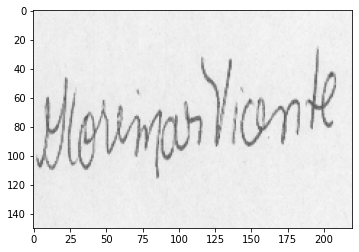

In [27]:
plt.imshow(sign_1[0])

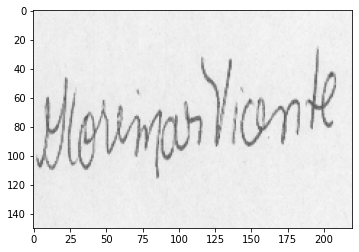

In [28]:
plt.imshow(sign_2[0])

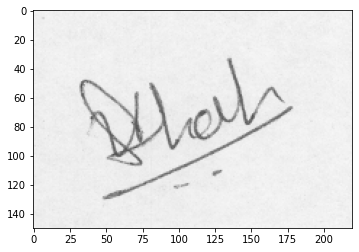

In [29]:
plt.imshow(sign_1[1])

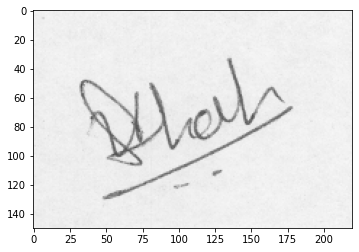

In [30]:
plt.imshow(sign_2[1])

In [31]:
train_set.label.head()

60      1
1011    1
1478    0
1915    0
2091    0
Name: label, dtype: int64

In [32]:
import seaborn as sns

In [33]:
label[0:6]

60      1
1011    1
1478    0
1915    0
2091    0
415     0
Name: label, dtype: int64

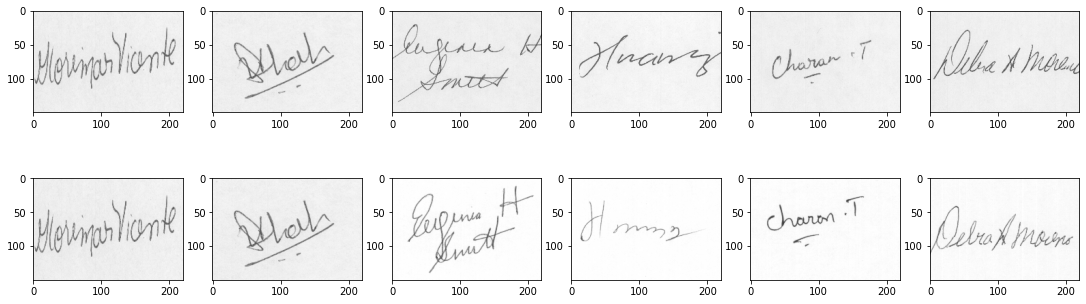

In [34]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in range(0,6):
  ax[index].imshow(sign_1[i])
  index +=1
  ax[index+5].imshow(sign_2[i])
plt.tight_layout(pad=0.4)
plt.show()

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda,Conv2D, BatchNormalization, Add, Activation, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler, ModelCheckpoint, CSVLogger, ReduceLROnPlateau
%load_ext tensorboard
tf.get_logger().setLevel('INFO')


In [36]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [37]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [38]:
sign_1[1].shape

(150, 220, 3)

In [39]:
def initialize_base_network():
  
  input = Input(shape=(150,220,3),name = 'base_input')
  x = Conv2D(64, 7, activation='relu' ,padding ='same')(input)
  x = Conv2D(64,1, activation = 'relu' )(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  it1 = MaxPool2D((3,3))(x)

  x = Conv2D(64, 5, padding ='same')(it1)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(64, 5, padding ='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Add()([x,it1])
  it2 = Activation('relu')(x)

  x = Conv2D(64, 3, padding ='same')(it2)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(64, 3, padding ='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Add()([x,it2])
  it2 = Activation('relu')(x)

  x = GlobalAveragePooling2D()(x)

  output = Dense(16, activation='relu')(x)

  return Model(inputs=input, outputs = output)


In [40]:
with tpu_strategy.scope():
  base_network = initialize_base_network()

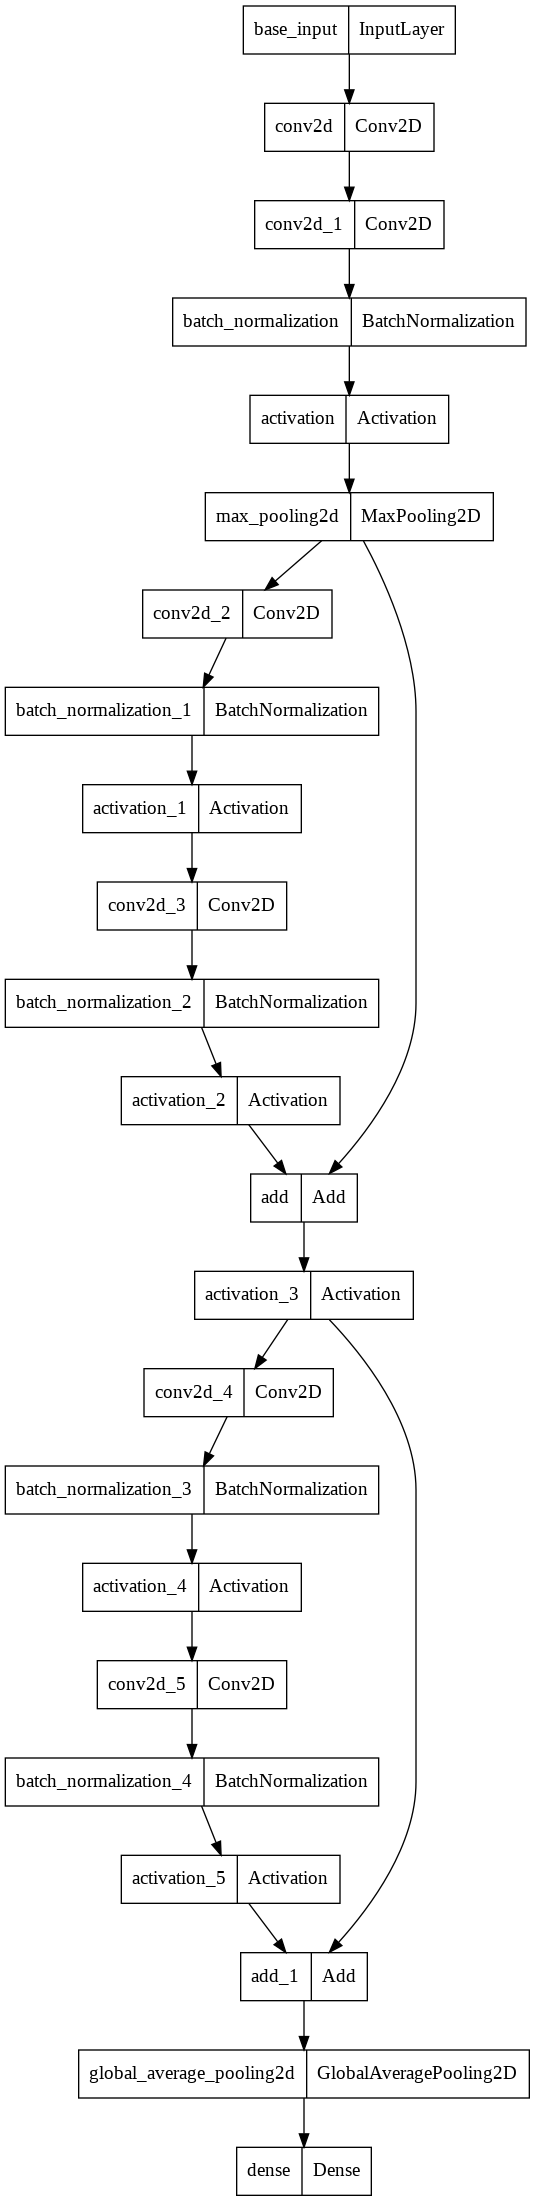

In [41]:
tf.keras.utils.plot_model(base_network, to_file='base_network.png')

In [42]:
base_network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 base_input (InputLayer)        [(None, 150, 220, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 150, 220, 64  9472        ['base_input[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 150, 220, 64  4160        ['conv2d[0][0]']                 
                                )                                                             

In [43]:
input_a = Input(shape=(150,220,3), name="left_input")

In [44]:
vect_output_a = base_network(input_a)

In [45]:
input_b = Input(shape=(150,220,3), name="right_input")

In [46]:
vect_output_b = base_network(input_b)

In [47]:
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

In [48]:
with tpu_strategy.scope():
  model = Model([input_a, input_b], output)

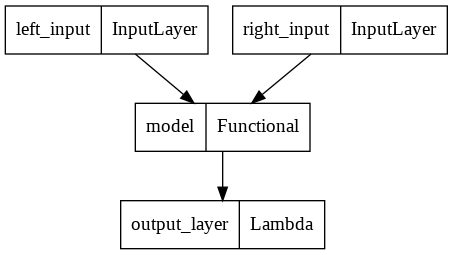

In [49]:
tf.keras.utils.plot_model(model, to_file='siamese_model.png')

In [50]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 150, 220, 3  0           []                               
                                )]                                                                
                                                                                                  
 right_input (InputLayer)       [(None, 150, 220, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 16)           294736      ['left_input[0][0]',             
                                                                  'right_input[0][0]']      

In [51]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [52]:
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer='adam')

In [53]:
sign_1 = np.asarray(sign_1)
sign_2 = np.asarray(sign_2)
label = np.asarray(label)

In [54]:
val_sign_1 = np.asarray(val_sign_1)
val_sign_2 = np.asarray(val_sign_2)
val_label = np.asarray(val_label)

In [55]:
sign_1.shape, sign_2.shape, label.shape, val_sign_1.shape, val_sign_2.shape, val_label.shape

((1848, 150, 220, 3),
 (1848, 150, 220, 3),
 (1848,),
 (792, 150, 220, 3),
 (792, 150, 220, 3),
 (792,))

In [56]:
label = label.astype(float)
val_label = val_label.astype(float)

In [57]:
import datetime

In [58]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [59]:
csv_file = 'training.csv'

In [60]:
history = model.fit([sign_1, sign_2], label, 
                    epochs=25, batch_size=128, 
                    #validation_data=([val_sign_1, val_sign_2], val_label),
                    validation_split = 0.2,
                    verbose = 2,         
                    callbacks=[EarlyStopping(
                        patience=10,
                        min_delta=0.05,
                        baseline=0.8,
                        mode='min',
                        monitor='val_loss',
                        restore_best_weights=True,
                        verbose=1),
                        CSVLogger(csv_file),
#                        ReduceLROnPlateau(monitor='val_loss', 
#                                       factor=0.2, verbose=1,
#                                       patience=1, min_lr=0.001)
                    ]) 
                    

Epoch 1/25
12/12 - 73s - loss: 0.1552 - val_loss: 4.3784e-08 - 73s/epoch - 6s/step
Epoch 2/25
12/12 - 2s - loss: 0.0516 - val_loss: 4.3784e-08 - 2s/epoch - 176ms/step
Epoch 3/25
12/12 - 2s - loss: 0.0201 - val_loss: 4.3784e-08 - 2s/epoch - 174ms/step
Epoch 4/25
12/12 - 2s - loss: 0.0152 - val_loss: 4.3784e-08 - 2s/epoch - 174ms/step
Epoch 5/25
12/12 - 2s - loss: 0.0128 - val_loss: 2.5039e-04 - 2s/epoch - 176ms/step
Epoch 6/25
12/12 - 2s - loss: 0.0121 - val_loss: 2.2640e-04 - 2s/epoch - 172ms/step
Epoch 7/25
12/12 - 2s - loss: 0.0086 - val_loss: 0.0016 - 2s/epoch - 176ms/step
Epoch 8/25
12/12 - 2s - loss: 0.0131 - val_loss: 4.7139e-05 - 2s/epoch - 170ms/step
Epoch 9/25
12/12 - 2s - loss: 0.0092 - val_loss: 3.2780e-07 - 2s/epoch - 174ms/step
Epoch 10/25
12/12 - 2s - loss: 0.0102 - val_loss: 3.2822e-04 - 2s/epoch - 173ms/step
Epoch 11/25
Restoring model weights from the end of the best epoch: 1.
12/12 - 2s - loss: 0.0091 - val_loss: 0.0011 - 2s/epoch - 203ms/step
Epoch 11: early stopping

In [61]:
model.save('final_model.h5')

In [62]:
#%tensorboard --logdir logs

In [63]:
#del model

In [64]:
#from tensorflow import keras

In [65]:
#model = keras.models.load_model('final_model.h5')

In [66]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


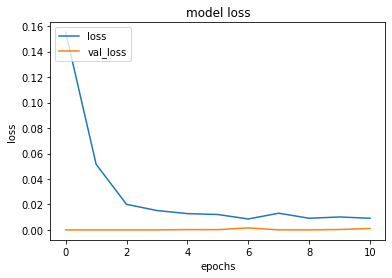

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [68]:
pd.read_csv('training.csv')

,epoch,loss,val_loss
0,0,0.155246,4.378379e-08
1,1,0.051592,4.378379e-08
2,2,0.020088,4.378379e-08
3,3,0.015222,4.378379e-08
4,4,0.012805,2.503940e-04
5,5,0.012091,2.264005e-04
6,6,0.008591,1.571979e-03
7,7,0.013131,4.713924e-05
8,8,0.009153,3.278010e-07
9,9,0.010177,3.282175e-04


In [69]:
np.unique(val_label, return_counts=True)

(array([0., 1.]), array([393, 399]))

In [70]:
val_label[:6]

array([1., 1., 0., 0., 1., 0.])

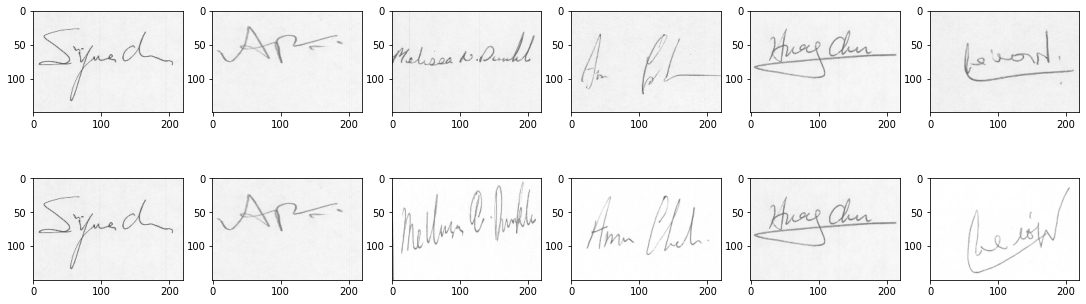

In [71]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in range(0,6):
  ax[index].imshow(val_sign_1[i])
  index +=1
  ax[index+5].imshow(val_sign_2[i])
plt.tight_layout(pad=0.4)
plt.show()

In [72]:
model.predict([val_sign_1[:6], val_sign_2[:6]])

array([[3.1622779e-04],
       [3.1622779e-04],
       [1.3735807e+01],
       [1.0259782e+01],
       [3.1622779e-04],
       [1.2845930e+01]], dtype=float32)

In [105]:
predictions = model.predict([val_sign_1, val_sign_2])

In [106]:
predictions[:10]

array([[3.16227786e-04],
       [3.16227786e-04],
       [1.37358074e+01],
       [1.02597818e+01],
       [3.16227786e-04],
       [1.28459301e+01],
       [3.16227786e-04],
       [1.05198145e+01],
       [3.16227786e-04],
       [3.16227786e-04]], dtype=float32)

In [107]:
np.where(predictions<0.5)

(array([  0,   1,   4,   6,   8,   9,  13,  14,  15,  16,  17,  21,  22,
         23,  31,  32,  36,  37,  38,  41,  44,  45,  53,  54,  57,  58,
         59,  60,  62,  63,  64,  68,  70,  72,  75,  78,  83,  87,  88,
         89,  92,  93,  95,  96,  97,  98, 101, 102, 103, 107, 108, 109,
        110, 113, 115, 116, 120, 124, 125, 128, 130, 131, 133, 134, 135,
        136, 137, 141, 143, 144, 146, 148, 150, 151, 157, 160, 162, 164,
        165, 166, 168, 169, 170, 172, 174, 176, 178, 179, 181, 184, 185,
        187, 188, 191, 192, 193, 195, 197, 198, 199, 200, 201, 203, 205,
        206, 207, 209, 211, 212, 215, 218, 219, 220, 221, 223, 224, 226,
        228, 232, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
        247, 250, 251, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263,
        265, 269, 271, 272, 279, 282, 283, 285, 287, 288, 289, 291, 292,
        294, 296, 297, 298, 300, 302, 303, 308, 309, 310, 312, 314, 318,
        319, 320, 323, 324, 329, 332, 333, 335, 336

In [121]:
tof = predictions<0.5

In [122]:
tof = np.asarray(tof)

In [123]:
tof.shape

(792, 1)

In [125]:
tof = tof.reshape(792,)

In [126]:
tof[:5]

array([ True,  True, False, False,  True])

In [128]:
tof = np.where(tof==True,1,0)

In [129]:
np.unique(tof, return_counts =True)

(array([0, 1]), array([393, 399]))

In [104]:
np.unique(val_label, return_counts=True)

(array([0., 1.]), array([393, 399]))

In [130]:
from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(val_label, tof)

1.0